# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#this bit of code connects the google drive with this workingbook

Mounted at /content/drive


### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Projects/Space Launch Analysis/mission_launches.csv')

# Preliminary Data Exploration

In [ ]:
shape = df_data.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")
print(f"The column names are {df_data.columns}")

The dataset has 4324 rows and 9 columns.
The column names are Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [ ]:
nan_val = df_data.isna().values.any()
dup_val = df_data.duplicated().values.any()
print(f"NaN values exist: {nan_val}")
print(f"Duplicate values exist: {dup_val}")

NaN values exist: True
Duplicate values exist: False


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
print(df_data.head())
# we can see that the first 2 columns are irrelevant for our analysis

# dropping the 2 columns
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace=True)
df_data.head()

   Unnamed: 0  Unnamed: 0.1 Organisation  ... Rocket_Status  Price Mission_Status
0           0             0       SpaceX  ...  StatusActive   50.0        Success
1           1             1         CASC  ...  StatusActive  29.75        Success
2           2             2       SpaceX  ...  StatusActive    NaN        Success
3           3             3    Roscosmos  ...  StatusActive   65.0        Success
4           4             4          ULA  ...  StatusActive  145.0        Success

[5 rows x 9 columns]


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.sample(5)

# by taking random samples we see that the NaN values are due to the price of the mission not being disclosed
# filling the NaN values with 0
df_data["Price"].fillna(value=0, inplace=True)
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1223,Northrop,"Stargazer, Vandenberg AFB, California, USA","Sat Dec 04, 1999 18:53 UTC",Pegasus XL/HAPS | Orbcomm D1-D8,StatusActive,40.0,Success
315,MHI,"LA-Y1, Tanegashima Space Center, Japan","Mon Oct 09, 2017 22:01 UTC",H-IIA 202 | QZS-4,StatusActive,90.0,Success
432,CASC,"LC-3, Xichang Satellite Launch Center, China","Sun Jun 12, 2016 15:30 UTC",Long March 3C/E | BeiDou-2 G7,StatusActive,0,Success
3822,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Mon Nov 28, 1966 11:00 UTC",Soyuz | Cosmos 133,StatusRetired,0,Success
844,VKS RF,"Site 132/1, Plesetsk Cosmodrome, Russia","Thu Nov 01, 2007 00:51 UTC",Cosmos-3M (11K65M) | SAR-Lupe 3,StatusRetired,0,Success


## Descriptive Statistics

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,United States of America,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,USA


In [ ]:
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO_Code
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,United States of America,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0.00,Success,United States of America,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,United States of America,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,KAZ
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,0.00,Success,Kazakhstan,KAZ


In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3879


In [ ]:
df_data.info()

# to make creating graphs easier, let's change the "Date" column into DateTime object

df_data["Date"] = pd.to_datetime(df_data["Date"], utc=True)
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           4324 non-null   object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
org_launches = df_data.value_counts("Organisation")[:20]
org_launches

# there are so many different organisations and quite a few of them have seemingly only launched 1 rocket
# we are better off focusing only on the top 20 launcher organisations for better readability of the graph

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
dtype: int64

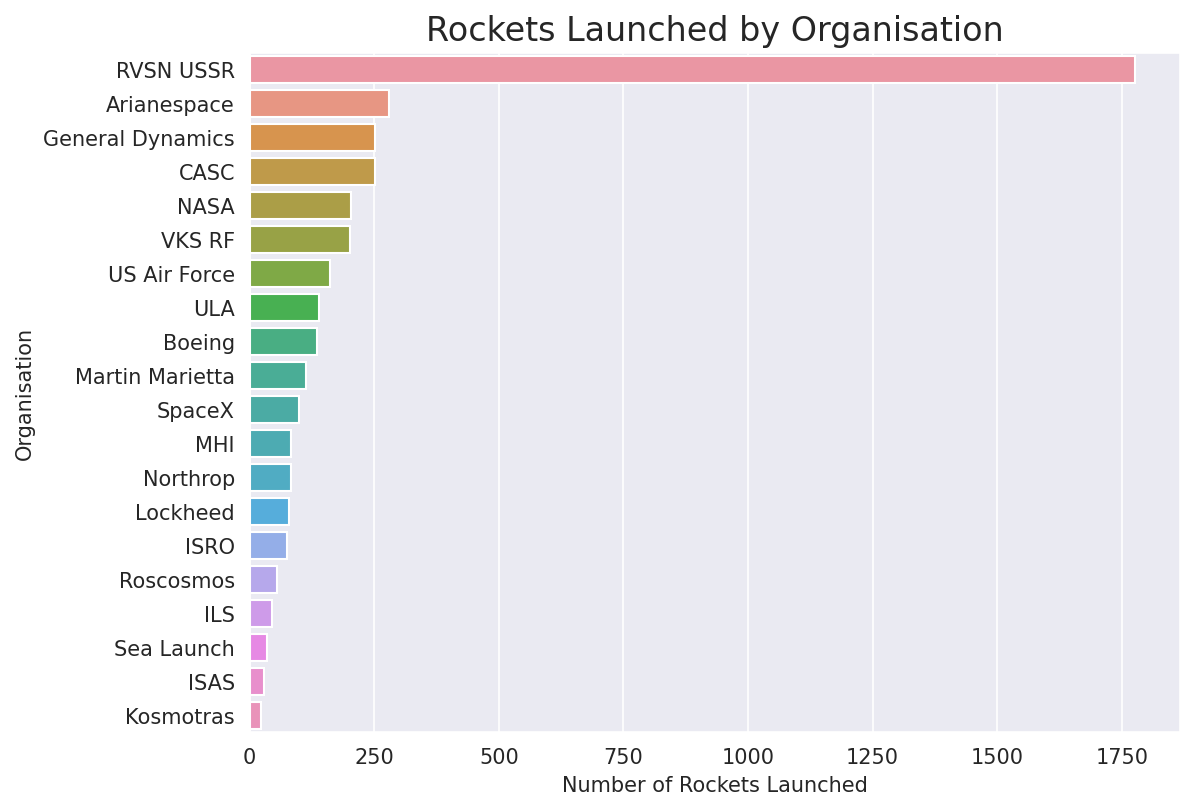

In [ ]:
plt.figure(figsize=(8, 6), dpi=150)

with sns.axes_style("darkgrid"):
  sns.barplot(x=org_launches.values,
              y=org_launches.index,
              orient="h")
  
plt.title("Rockets Launched by Organisation", fontsize=16)
plt.xlabel("Number of Rockets Launched")

plt.show()

# Number of Active versus Retired Rockets

In [ ]:
rocket_status = df_data.value_counts("Rocket_Status")

In [ ]:
print(f"Currently there are {rocket_status[1]} active rockets.")
print(f"The number of retired rockets is {rocket_status[0]}")

Currently there are 790 active rockets.
The number of retired rockets is 3534


# Distribution of Mission Status

In [ ]:
missions = df_data.value_counts("Mission_Status")
missions_sum = missions.sum()

In [ ]:
print(f"Out of the {missions_sum} missions:\n{missions[0]} were successful\n{missions[1]} failures")

Out of the 4324 missions:
3879 were successful
339 failures


# Cost of Launches


In [ ]:
# first, changing the price column strings into numeric

df_data["Price"] = df_data["Price"].astype(str).str.replace(",", "")
df_data["Price"] = pd.to_numeric(df_data["Price"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           4324 non-null   float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [ ]:
# only choosing the data that has a price determined for the launch project
launch_prices = df_data.query("Price > 0")
launch_prices.sort_values("Price")

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2019-09-19 06:42:00+00:00,Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2018-01-19 04:12:00+00:00,"Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China",2020-05-29 20:13:00+00:00,Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2018-12-21 23:51:00+00:00,Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2015-09-25 00:00:00+00:00,Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03 16:00:00+00:00,Saturn V | Apollo 9,StatusRetired,"1,160.00",Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


In [ ]:
hist_fig = px.histogram(data_frame=launch_prices,
                    x="Price",
                    )

hist_fig.show()

The two USSR project called Energiya/Buran | Buran & Energiya/Polyus | Polyus Space Station warp the histogram quite a lot with their estimated $5 billion price tags. Let's make another histogram with those two points of data excluded.

In [ ]:
launch_prices_fmt = launch_prices[launch_prices.Price < 5000]

hist_fig = px.histogram(data_frame=launch_prices_fmt,
                    x="Price",
                    title="Histogram of Rocket Launch Prices",
                    )

hist_fig.update_layout(xaxis_title="Price in $ millions",
                       yaxis_title="Number of Projects",
                       )
hist_fig.show()

# Choropleth Map to Show the Number of Launches by Country


In [ ]:
df_data
df_data["Country"] = df_data["Location"].apply(lambda x: x.split(", ")[-1])
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


We can see that certain locations didn't have the country at the end of the string. Let's change these manually to the correct country.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA
* Pacific Ocean should be USA

Also changing the names of Iran, North & South Korea for easier conversion with ISO3166 library

(Using countries.get() helps figuring out the names needed for receiving alpha3 codes)

In [ ]:
df_data["Country"] = df_data["Country"].str.replace("Russia", "Russian Federation")
df_data["Country"] = df_data["Country"].str.replace("USA", "United States of America")
df_data["Country"] = df_data["Country"].str.replace("New Mexico", "United States of America")
df_data["Country"] = df_data["Country"].str.replace("Yellow Sea", "China")
df_data["Country"] = df_data["Country"].str.replace("Shahrud Missile Test Site", "Iran")
df_data["Country"] = df_data["Country"].str.replace("Pacific Missile Range Facility", "United States of America")
df_data["Country"] = df_data["Country"].str.replace("Barents Sea", "Russian Federation")
df_data["Country"] = df_data["Country"].str.replace("Gran Canaria", "United States of America")
df_data["Country"] = df_data["Country"].str.replace("Pacific Ocean", "United States of America")

df_data["Country"] = df_data["Country"].str.replace("North Korea", "Korea, Democratic People's Republic of")
df_data["Country"] = df_data["Country"].str.replace("South Korea", "Korea, Republic of")
df_data["Country"] = df_data["Country"].str.replace("Iran", "Iran, Islamic Republic of")

Function to return the ISO code 

In [ ]:
def iso_code(x):
  iso = countries.get(x)
  return iso[2]

Converting the countries into ISO codes

In [ ]:
df_data["ISO_Code"] = df_data["Country"].apply(lambda x: x.replace(x, iso_code(x)))

Finally we can plot the Choropleth Map

In [ ]:
choro_launches_df = df_data.groupby(["ISO_Code", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
choro_launches_df.rename(columns={"Mission_Status": "Launch Counts"}, inplace=True)

fig = px.choropleth(choro_launches_df, locations="ISO_Code",
                    color="Launch Counts", 
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title="Launches by Country")
fig.show()

# Choropleth Map to Show the Number of Failures by Country


In [ ]:
mission_failures_df = df_data.query("Mission_Status == 'Failure'")
mission_failures_df = mission_failures_df.groupby(["ISO_Code", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
mission_failures_df.rename(columns={"Mission_Status": "Failed Missions"}, inplace=True)

In [ ]:
fig = px.choropleth(mission_failures_df,
                    locations="ISO_Code",
                    color="Failed Missions",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Sunsetdark,
                    )

fig.show()

# Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
sunburst_df = df_data[["ISO_Code", "Organisation", "Mission_Status"]]

In [ ]:
sunburst = px.sunburst(sunburst_df,
                       path=["ISO_Code", "Organisation", "Mission_Status"],
                       color_continuous_scale="Magma"
                       )

sunburst.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_spent = df_data.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})
total_spent.sort_values("Price", ascending=True, inplace=True)

#better off dropping all the organisations we don't have price data about
total_spent.query("Price > 0", inplace=True)

In [ ]:
spending = px.bar(total_spent,
                  x="Price",
                  y="Organisation",
                  orientation="h",
                  color="Price",
                  barmode="group")

spending.update_layout(xaxis_title="Price in $millions")

spending.show()

# Number of Launches per Year

In [ ]:
launches_yr_df = pd.DataFrame(data=df_data.ISO_Code, index=df_data.Date, columns=["Launches"]) # creating a dataframe for date column as index
launches_yr_df.sort_index(ascending=True, inplace=True) # sorting index to ascending dates
launches_yr_df.fillna(1, inplace=True) # filling NaN values (whole "Launches column") with 1
launches_yr_df = launches_yr_df.groupby(pd.Grouper(freq="Y")).sum() # calculating the cumulative sum for rows
launches_yr_df.reset_index(inplace=True)

In [ ]:
launches_yr = px.bar(data_frame=launches_yr_df,
                     x="Date",
                     y="Launches")

launches_yr.update_layout(xaxis_title="Year",
                          yaxis_title="Number of Launches",
                          )
launches_yr.show()

# Launches per Month: Which months are most popular and least popular for launches


In [ ]:
!pip install Datetime

     |████████████████████████████████| 60 kB 4.3 MB/s 
     |████████████████████████████████| 251 kB 16.8 MB/s 


In [ ]:
launches_monthly = pd.DataFrame(data=df_data.ISO_Code, index=df_data.Date, columns=["Launches"]) # creating a dataframe for date column as index
launches_monthly.sort_index(ascending=True, inplace=True) # sorting index to ascending dates
launches_monthly.fillna(1, inplace=True) # filling NaN values (whole "Launches column") with 1
launches_monthly = launches_monthly.groupby(pd.Grouper(freq="M")).sum() # calculating the cumulative sum for rows
launches_monthly.reset_index(inplace=True)

from datetime import datetime

#converting the datetime object into month names and calculating the mean for launches per month
launches_monthly["Date"] = launches_monthly.Date.dt.strftime("%b")
hist_df = launches_monthly.groupby("Date", as_index=False).agg({"Launches": pd.Series.mean}).sort_values("Launches")

In [ ]:
fig = px.histogram(x=hist_df.Date,
             y=hist_df.Launches,
             title="Average Launches per Month")

fig.update_layout(xaxis_title="Month of the Year",
                  yaxis_title="Average Number of Launches")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
USSR_fall_date = "1991-12-26"
cold_war_df = df_data[df_data.Date < USSR_fall_date]

#creating the sub groups for USSR and the USA
sub_USSR = cold_war_df.loc[cold_war_df["Organisation"] == "RVSN USSR"] 
sub_USA = cold_war_df.query("ISO_Code == 'USA'")

#combining the two
cold_war_df = pd.concat([sub_USA, sub_USSR], ignore_index=True)

#changing ISO_Code KAZ to RUS for easier graphing
cold_war_df.ISO_Code.replace("KAZ", "RUS", inplace=True)

## Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Including former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
pie_df = cold_war_df.groupby("ISO_Code", as_index=False).agg({"Mission_Status": pd.Series.count})
pie_df.rename(columns={"Mission_Status": "Launches"}, inplace=True)
fig = px.pie(pie_df, 
             names="ISO_Code",
             values="Launches",
             title="Launches USA vs USSR",
             hole=0.6
             )

fig.update_traces(textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
line_df = cold_war_df.groupby(by=['ISO_Code', pd.Grouper(key="Date", freq="Y")]).count().groupby(level=[0]).cumsum()
line_df.reset_index(inplace=True)
line_df.rename(columns={"Organisation": "Launches"}, inplace=True)

In [ ]:
fig = px.line(line_df,
              x="Date",
              y="Launches",
              color="ISO_Code",
              title="Year on Year Launches by the Two Superpowers")

fig.update_layout(xaxis_title="Year")

fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
country_launches_df = df_data.groupby(["Country", pd.Grouper(key="Date", freq="Y")]).count().groupby(level=[0]).cumsum()
country_launches_df.reset_index(inplace=True)
country_launches_df.rename(columns={"Organisation": "Launches"}, inplace=True)

In [ ]:
fig = px.line(country_launches_df,
              x="Date",
              y="Launches",
              color="Country")

fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
org_launches = df_data.groupby(["Organisation", pd.Grouper(key="Date", freq="Y")]).count().groupby(level=[0]).cumsum()
org_launches.reset_index(inplace=True)
org_launches.rename(columns={"Mission_Status": "Launches"}, inplace=True)

In [ ]:
fig = px.line(org_launches,
              x="Date",
              y="Launches",
              color="Organisation")

fig.show()